In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
import plotly.graph_objects as go  #plotly 4.0.0rc1
from plotly.subplots import make_subplots
from matplotlib import pyplot
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import itertools

from importlib import reload
import matplotlib.cm as cm
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## The Rényi bound as a function of the variational posterior for arm 1

In [4]:
data_contour = pd.read_csv('../../numerical_analysis/contour_1e-06.csv')
data_contour1 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour = pd.read_csv('../../numerical_analysis/contour_0.5.csv')
data_contour2 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour = pd.read_csv('../../numerical_analysis/contour_0.99999.csv')
data_contour3 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour = pd.read_csv('../../numerical_analysis/contour_1000000000.0.csv')
data_contour4 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

In [5]:
levels1 = np.logspace(np.log10(data_contour1.to_numpy().min()),np.log10(data_contour1.to_numpy().min())+0.1, num=10)
levels2 = np.logspace(np.log10(data_contour1.to_numpy().min())+0.135,np.log10(data_contour1.to_numpy().max()), num=20)
levels_1 = np.concatenate([levels1,levels2])

levels1 = np.logspace(np.log10(data_contour2.to_numpy().min()),np.log10(data_contour2.to_numpy().min())+0.1, num=10)
levels2 = np.logspace(np.log10(data_contour2.to_numpy().min())+0.135,np.log10(data_contour2.to_numpy().max()), num=20)
levels_2 = np.concatenate([levels1,levels2])

levels1 = np.logspace(np.log10(data_contour3.to_numpy().min()-0.000000001),np.log10(data_contour3.to_numpy().min())+0.1, num=4)
levels2 = np.logspace(np.log10(data_contour3.to_numpy().min())+0.135,np.log10(data_contour3.to_numpy().max()+0.001), num=20)
levels_3 = np.concatenate([levels1,levels2])

levels1 = np.logspace(np.log10(data_contour4.to_numpy().min()),np.log10(data_contour4.to_numpy().min())+0.1, num=4)
levels2 = np.logspace(np.log10(data_contour4.to_numpy().min())+0.135,np.log10(data_contour4.to_numpy().max()), num=20)
levels_4 = np.concatenate([levels1,levels2])

levels_1 = -levels_1[::-1]
levels_2 = -levels_2[::-1]
levels_3 = -levels_3[::-1]
levels_4 = -levels_4[::-1]


data_contour1 = - data_contour1
data_contour2 = - data_contour2
data_contour3 = - data_contour3
data_contour4 = - data_contour4


/home/francesco/.local/lib/python3.7/site-packages/ipykernel_launcher.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/francesco/.local/lib/python3.7/site-packages/ipykernel_launcher.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


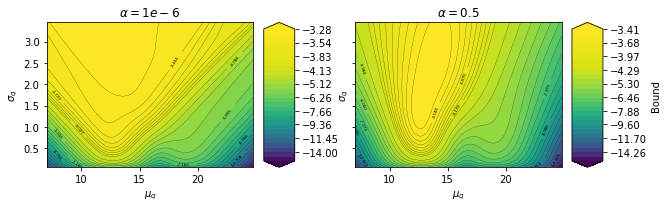

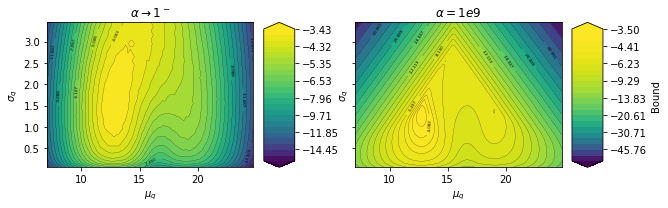

In [7]:
delta1 = 0.2
delta2 = 0.1
xlist = np.arange(7, 25, delta1)
ylist = np.arange(0.05, 3.5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig1, axes1 = plt.subplots(1, 2, figsize =(8,3), sharey=True, sharex=True)
fig2, axes2 = plt.subplots(1, 2, figsize =(8,3), sharey=True, sharex=True)

#cp = ax.contourf(x, y, data_contour.values.tolist(), 50, linewidths=1)
#line_colors = ['black' for l in cp.levels]


cpf1 = axes1[0].contourf(x, y, data_contour1.values.tolist(), levels_1, extend="both")
line_colors1 = ['black' for l in cpf1.levels]
cp1 = axes1[0].contour(x, y, data_contour1.values.tolist(),
                       levels=levels_1, colors=line_colors1, linewidths=linewidth_contour)


# Set all level lines to black
cpf2 = axes1[1].contourf(x, y, data_contour2.values.tolist(), levels_2, extend="both")
line_colors2 = ['black' for l in cpf2.levels]
cp2 = axes1[1].contour(x, y, data_contour2.values.tolist(),
                       levels=levels_2, colors=line_colors2, linewidths=linewidth_contour)
# Make plot and customize axes
#plt.colorbar(cp)
cpf3 = axes2[0].contourf(x, y, data_contour3.values.tolist(), levels_3, extend="both")
line_colors3 = ['black' for l in cpf3.levels]
cp3 = axes2[0].contour(x, y, data_contour3.values.tolist(),
                       levels=levels_3, colors=line_colors3, linewidths=linewidth_contour)

# Set all level lines to black
cpf4 = axes2[1].contourf(x, y, data_contour4.values.tolist(), levels_4, extend="both")
line_colors4 = ['black' for l in cpf4.levels]
cp4 = axes2[1].contour(x, y, data_contour4.values.tolist(),
                       levels=levels_4, colors=line_colors4, linewidths=linewidth_contour)
#ax.clabel(cp, fontsize=10, colors=line_colors)


#axes.set_box_aspect(1)
#axes[0].set_box_aspect(1)
#axes[1].set_box_aspect(1)
#axes[2].set_box_aspect(1)
#axes[3].set_box_aspect(1)
axins0 = inset_axes(axes1[0],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes1[0].transAxes,
                   borderpad=0,
                   )

axins1 = inset_axes(axes1[1],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes1[1].transAxes,
                   borderpad=0,
                   )

axins2 = inset_axes(axes2[0],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes2[0].transAxes,
                   borderpad=0,
                   )

axins3 = inset_axes(axes2[1],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes2[1].transAxes,
                   borderpad=0,
                   )
axes1[0].clabel(cp1, cp1.levels[::3], inline=True, fontsize=4)
axes1[1].clabel(cp2, cp2.levels[::3], inline=True, fontsize=4)
axes2[0].clabel(cp3, cp3.levels[::3], inline=True, fontsize=4)
axes2[1].clabel(cp4, cp4.levels[::3], inline=True, fontsize=4)



plt.colorbar(cpf1, cax=axins0)  # draw colorbar
plt.colorbar(cpf2,label='Bound', cax=axins1)  # draw colorbar
plt.colorbar(cpf3, cax=axins2)  # draw colorbar

plt.colorbar(cpf4,label='Bound', cax=axins3)  # draw colorbar

#fig.text(0.51, 0.01, 'Bias', ha='center')
#fig.text(0.00, 0.5, 'Weight', va='center', rotation='vertical')#axes[0].set_title(r'Optimization in the true $J(\theta)$')
axes1[0].set_xlabel(r'$\mu_q$')
axes1[0].set_ylabel(r'$\sigma_q$')
axes1[0].set_title(r'$\alpha = 1e-6$')
axes1[1].set_title(r'$\alpha = 0.5$')
axes2[0].set_title(r'$\alpha \rightarrow 1^-$')
axes2[1].set_title(r'$\alpha = 1e9$')
axes1[1].set_xlabel(r'$\mu_q$')
axes1[1].set_ylabel(r'$\sigma_q$')
axes2[0].set_xlabel(r'$\mu_q$')
axes2[0].set_ylabel(r'$\sigma_q$')
axes2[1].set_xlabel(r'$\mu_q$')
axes2[1].set_ylabel(r'$\sigma_q$')
#fig1.suptitle('PVF optimization after 60 episodes', fontsize=8)
#fig2.suptitle('PVF optimization after 500 episodes', fontsize=8)
fig1.tight_layout(w_pad=8.5, h_pad=0.5)
fig2.tight_layout(w_pad=8.5, h_pad=4.5)
#fig1.savefig('contour_1.pdf', bbox_inches='tight', pad_inches=0)
#fig2.savefig('contour_2.pdf', bbox_inches='tight', pad_inches=0)